In [2]:
names = open('names.txt', 'r').read().splitlines()

In [3]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
# Some details about our dataset
size = len(names)
min_size_name = min(len(name) for name in names)
max_size_name = max(len(name) for name in names)

print(f"Number of names: {size}, min_size_name: {min_size_name}, max_size_name: {max_size_name}")

Number of names: 32033, min_size_name: 2, max_size_name: 15


 ### Let see the bigrams (Pair of previous and consecutive)

In [5]:
# Here we have included an special character at the beginning as well at the end (<S>, <E>)
dic_big = {} # Dictionary of bigrams, counts the occurrences of each bigram in all the names 
for name in names:
    chs = ['<S>'] + list(name) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        dic_big[bigram] = dic_big.get(bigram, 0) + 1

In [6]:
# Sorting all the bigrams in descending order
sorted(dic_big.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# We want to compare each character with all each other's. We have 26 characters plus 1 extra special token <.>
# to denote the start and the end of a word
# For that purpuse let's create a 27 X 27 matrix whichs contains the counts
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(names))))

# Mapping from character to integer
# We also want to specify <.> be at position 0 and all the other characters offset off
string_to_int = {char:integer+1 for integer, char in enumerate(chars)}
string_to_int['.'] = 0
print(string_to_int)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [9]:
# Mapping from integer to character
integer_to_char = {integer:char for char, integer in string_to_int.items()}
print(integer_to_char)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


### Create the training set

In [10]:
# Create the training set of bigrams (x, y)

xs, ys = [], []
for name in names[:1]:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = string_to_int[ch1]
        index2 = string_to_int[ch2]
        print(ch1, ch2)
        xs.append(index1)
        ys.append(index2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [11]:
print(f'xs: {xs}\nys: {ys}')

xs: tensor([ 0,  5, 13, 13,  1])
ys: tensor([ 5, 13, 13,  1,  0])


In [12]:
# Instead of feed in the index integers of each character we would feed
# the one-hot ecoding of each character present in each sample data

import torch.nn.functional as F
x_encoded = F.one_hot(xs, num_classes=27).float()
x_encoded

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
x_encoded.shape

torch.Size([5, 27])

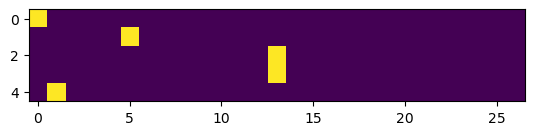

In [14]:
plt.imshow(x_encoded)

### Let's create a simple neuron

In [15]:
# The following NN will be one input layer of 27 inputs
W = torch.rand((27, 27))
W

tensor([[5.8723e-01, 9.8670e-01, 1.3737e-01, 9.4993e-01, 5.6194e-01, 8.1222e-01,
         7.9142e-01, 3.9939e-01, 8.3310e-01, 6.3339e-01, 5.6241e-01, 3.1227e-01,
         1.6752e-01, 4.8478e-01, 9.0114e-01, 2.4941e-01, 1.1364e-01, 8.0068e-01,
         9.9052e-01, 1.4645e-01, 4.4559e-01, 9.7911e-01, 5.7588e-01, 6.0391e-01,
         9.5890e-01, 4.8213e-01, 9.8885e-01],
        [5.3944e-02, 1.0068e-02, 7.0786e-01, 6.4534e-01, 6.8301e-01, 7.0503e-01,
         2.1792e-01, 8.7582e-03, 9.9641e-01, 9.3181e-01, 2.6313e-01, 6.4707e-01,
         2.3285e-01, 8.4853e-02, 2.8032e-01, 3.7532e-02, 9.0469e-01, 4.7370e-01,
         8.2761e-01, 2.4347e-01, 3.3764e-01, 1.3748e-01, 6.7769e-01, 6.6831e-01,
         6.5572e-01, 3.2992e-01, 3.5130e-01],
        [3.0662e-01, 6.1491e-01, 1.8958e-01, 4.8207e-01, 6.5023e-01, 4.0484e-01,
         9.9852e-01, 1.5908e-01, 5.2103e-01, 3.1659e-01, 1.1066e-01, 3.4745e-01,
         2.1458e-01, 1.9270e-01, 7.7661e-01, 5.7043e-01, 7.2775e-01, 9.7895e-01,
         1.4209e-

In [16]:
# A = W*x + b where W is 27 X 27 and x is 5 X 27
x_encoded @ W

tensor([[0.5872, 0.9867, 0.1374, 0.9499, 0.5619, 0.8122, 0.7914, 0.3994, 0.8331,
         0.6334, 0.5624, 0.3123, 0.1675, 0.4848, 0.9011, 0.2494, 0.1136, 0.8007,
         0.9905, 0.1465, 0.4456, 0.9791, 0.5759, 0.6039, 0.9589, 0.4821, 0.9888],
        [0.2068, 0.8167, 0.8130, 0.8656, 0.6369, 0.9640, 0.7904, 0.6018, 0.8260,
         0.7946, 0.2952, 0.5087, 0.1207, 0.1998, 0.1135, 0.4063, 0.2597, 0.3925,
         0.2333, 0.1805, 0.5588, 0.5241, 0.4782, 0.6800, 0.9628, 0.3056, 0.5815],
        [0.4052, 0.9537, 0.0158, 0.3362, 0.6135, 0.2340, 0.4418, 0.7454, 0.9282,
         0.1119, 0.1940, 0.9332, 0.5285, 0.7061, 0.5107, 0.6862, 0.5102, 0.5372,
         0.9039, 0.5289, 0.6783, 0.0731, 0.4081, 0.1832, 0.4822, 0.5172, 0.2215],
        [0.4052, 0.9537, 0.0158, 0.3362, 0.6135, 0.2340, 0.4418, 0.7454, 0.9282,
         0.1119, 0.1940, 0.9332, 0.5285, 0.7061, 0.5107, 0.6862, 0.5102, 0.5372,
         0.9039, 0.5289, 0.6783, 0.0731, 0.4081, 0.1832, 0.4822, 0.5172, 0.2215],
        [0.0539, 0.0101,

In [17]:
# For instance, this is telling us the firing rate (output) of the 13th neuron looking at the third input
# The way this was achieved is by a dot product between the third input and the 13th column of the W matrix
(x_encoded @ W)[3, 13]

tensor(0.7061)

In [18]:
x_encoded[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
W[:, 13]

tensor([0.4848, 0.0849, 0.1927, 0.0809, 0.7289, 0.1998, 0.7537, 0.3848, 0.5896,
        0.2451, 0.5452, 0.5339, 0.5438, 0.7061, 0.1406, 0.0569, 0.5056, 0.3457,
        0.5576, 0.4682, 0.7875, 0.9259, 0.0204, 0.8003, 0.9909, 0.5579, 0.7328])

In [20]:
(x_encoded[3] * W[:, 13]).sum()

tensor(0.7061)

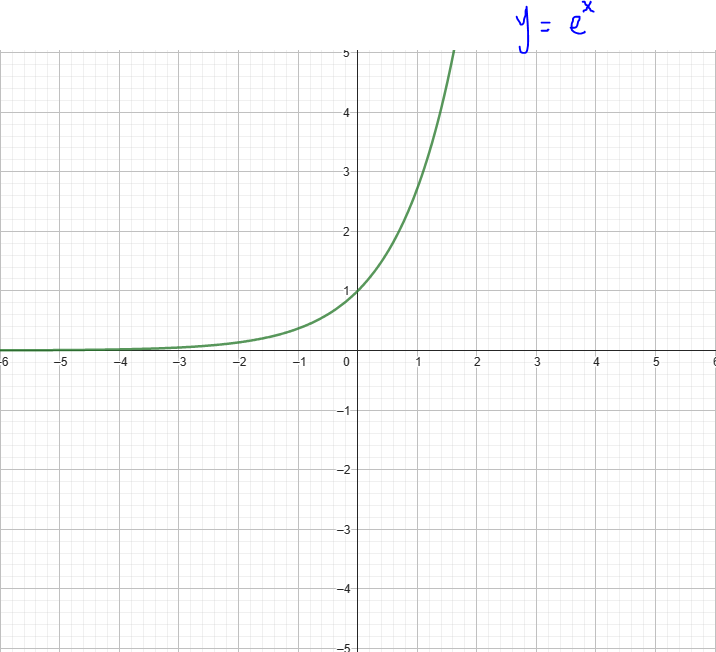

In [21]:
# Doing logits.exp() we are maping each R number to a positive number and can be interpreted
# as rates or counts
# 'counts' after applying the exponential function to 'logits' can be conceptually  similar to 'N'
# in that it represents counts or intensities of ceirtain features(in this case, character relationship as
# modeled by the network)
logits = x_encoded @ W # log-counts
counts =  logits.exp() # Equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0348, 0.0519, 0.0222, 0.0500, 0.0339, 0.0436, 0.0427, 0.0288, 0.0445,
         0.0364, 0.0339, 0.0264, 0.0229, 0.0314, 0.0476, 0.0248, 0.0217, 0.0431,
         0.0521, 0.0224, 0.0302, 0.0515, 0.0344, 0.0354, 0.0504, 0.0313, 0.0520],
        [0.0261, 0.0480, 0.0478, 0.0504, 0.0401, 0.0556, 0.0467, 0.0387, 0.0484,
         0.0469, 0.0285, 0.0353, 0.0239, 0.0259, 0.0237, 0.0318, 0.0275, 0.0314,
         0.0268, 0.0254, 0.0371, 0.0358, 0.0342, 0.0418, 0.0555, 0.0288, 0.0379],
        [0.0327, 0.0565, 0.0221, 0.0305, 0.0402, 0.0275, 0.0339, 0.0459, 0.0551,
         0.0244, 0.0264, 0.0554, 0.0370, 0.0441, 0.0363, 0.0433, 0.0363, 0.0373,
         0.0538, 0.0370, 0.0429, 0.0234, 0.0328, 0.0262, 0.0353, 0.0365, 0.0272],
        [0.0327, 0.0565, 0.0221, 0.0305, 0.0402, 0.0275, 0.0339, 0.0459, 0.0551,
         0.0244, 0.0264, 0.0554, 0.0370, 0.0441, 0.0363, 0.0433, 0.0363, 0.0373,
         0.0538, 0.0370, 0.0429, 0.0234, 0.0328, 0.0262, 0.0353, 0.0365, 0.0272],
        [0.0238, 0.0228,

In [22]:
probs.shape

torch.Size([5, 27])

In [23]:
# For every one of our five examples now we have a row that came out of the neural network
# and the output of this neural network now are probabilities
probs[0].sum()

tensor(1.0000)

### Summary

In [24]:
# Input dataset
xs

tensor([ 0,  5, 13, 13,  1])

In [25]:
# Labels for the correct next character in a sequeance
ys

tensor([ 5, 13, 13,  1,  0])

In [26]:
# Randomly initialize 27 neurons's weights. Each neuron receives 27 inputs
random_generator = torch.Generator().manual_seed(2147483647 + 1)
W = torch.rand((27, 27), generator=random_generator)

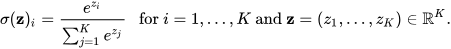

In [27]:
# A = [[1, 2, 3],
#     [4, 5, 6]]

# Applying A.sum(1, keepdims=True) would produce:

# [[ 6],
#  [15]]

# The operation counts.sum(1, keepdims=True) in PyTorch adds the values over the columns for each row.
# This means that for each row in the counts tensor, it computes the sum of all its column values,
# resulting in a sum for each row.

In [28]:
# Input to the network: one-hot encoding
x_encoded = F.one_hot(xs, num_classes=27).float()
logits = x_encoded @ W # predict log-counts
counts = logits.exp() # Counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # Probabilities for next character
# The last 2 lines here are together called a 'softmax'

In [29]:
probs.shape

torch.Size([5, 27])

In [30]:
negative_log_likelihoods = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('---------')
    print(f'bigram example {i+1}: {integer_to_char[x]}{integer_to_char[y]} (indixes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    prob = probs[i, y]
    print('Probability assigned by the net to the correct character:', prob.item())
    log_prob = torch.log(prob)
    print('log likelihood:', log_prob.item())
    negative_log_likelihood = -log_prob
    print('negative log likelihood:', negative_log_likelihood.item())
    negative_log_likelihoods[i] = negative_log_likelihood

print('============')
print('average negative log likelihood, i.e. loss =', negative_log_likelihoods.mean().item())

---------
bigram example 1: .e (indixes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0542, 0.0498, 0.0231, 0.0301, 0.0369, 0.0372, 0.0364, 0.0294, 0.0394,
        0.0252, 0.0438, 0.0553, 0.0232, 0.0500, 0.0445, 0.0364, 0.0325, 0.0221,
        0.0218, 0.0397, 0.0232, 0.0328, 0.0348, 0.0458, 0.0438, 0.0320, 0.0566])
label (actual next character): 5
Probability assigned by the net to the correct character: 0.037207070738077164
log likelihood: -3.2912564277648926
negative log likelihood: 3.2912564277648926
---------
bigram example 2: em (indixes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0304, 0.0466, 0.0343, 0.0260, 0.0294, 0.0291, 0.0368, 0.0568, 0.0557,
        0.0248, 0.0487, 0.0388, 0.0542, 0.0445, 0.0249, 0.0238, 0.0239, 0.0265,
        0.0376, 0.0616, 0.0557, 0.0462, 0.0335, 0.0253, 0.0274, 0.0331, 0.0243])
label (actual next character): 13
Probability assigned by the net to the correct character: 0.044

### Optimization

In [31]:
xs

tensor([ 0,  5, 13, 13,  1])

In [32]:
ys

tensor([ 5, 13, 13,  1,  0])

In [33]:
# Randomly initialize 27 neurons's weights. Each neuron receives 27 inputs
random_generator = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27), generator=random_generator)

In [34]:
# Input to the network: one-hot encoding
x_encoded = F.one_hot(xs, num_classes=27).float()
logits = x_encoded @ W # predict log-counts
counts = logits.exp() # Counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # Probabilities for next character
# The last 2 lines here are together called a 'softmax'

In [35]:
probs.shape

torch.Size([5, 27])

In [36]:
# Here we are accessing specific probabilitites:

# probs[0, 5]: The probability that the character at the index 5 is the next character after
# the first character in the first input example.

# probs[1, 13]: The probability that the character at the index 13 is the next character 
# after the first character in the second input example.

# probs[2, 13]: The probability that the character at the index 13 is the next character after
# the first character in the third input example.
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0229),
 tensor(0.0258),
 tensor(0.0339),
 tensor(0.0341),
 tensor(0.0402))

In [37]:
# Probabilities of that the NN assigns to the correct next character
probs[torch.arange(5), ys]

tensor([0.0229, 0.0258, 0.0339, 0.0341, 0.0402])

In [38]:
loss = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.4815)

### Training

In [46]:
xs

tensor([ 0,  5, 13, 13,  1])

In [47]:
ys

tensor([ 5, 13, 13,  1,  0])

In [48]:
# Randomly initialize 27 neurons's weights. Each neuron receives 27 inputs
random_generator = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27), generator=random_generator, requires_grad=True)

In [85]:
# Forward pass

x_encoded = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding
logits = x_encoded @ W # predict log-counts
counts = logits.exp() # Counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # Probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [86]:
print(loss.item())

3.4044623374938965


In [79]:
# Note:
# When we do the forward pass it keeps track of all the operations, under the hood
# it builds a full computational graph (Just like the graphs we produced in Micrograd) those graphs
# exist inside pythorch. So it knows all the dependencies and all the mathematical operations of everything
# and when we then calculate the loss we can call (loss.backward()) on it and that backward then fills the gradients
# of all the intermediates all the way back to W's which are the parameters of our NN

In [80]:
# Backward pass
W.grad = None # Set to zero the gradient
loss.backward()

In [81]:
W.shape

torch.Size([27, 27])

In [82]:
# Every element of W.grad is telling us the influence of that weight on the loss function

In [83]:
W.grad

tensor([[ 0.0085,  0.0060,  0.0047,  0.0076,  0.0046, -0.1951,  0.0101,  0.0112,
          0.0042,  0.0056,  0.0088,  0.0063,  0.0099,  0.0088,  0.0062,  0.0052,
          0.0085,  0.0112,  0.0109,  0.0065,  0.0085,  0.0044,  0.0094,  0.0057,
          0.0113,  0.0059,  0.0052],
        [-0.1915,  0.0103,  0.0060,  0.0080,  0.0051,  0.0064,  0.0079,  0.0060,
          0.0062,  0.0110,  0.0093,  0.0080,  0.0077,  0.0093,  0.0116,  0.0077,
          0.0068,  0.0080,  0.0049,  0.0067,  0.0046,  0.0047,  0.0098,  0.0062,
          0.0070,  0.0051,  0.0072],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [84]:
# Update weights
W.data += -0.1 * W.grad

In [87]:
# When we achieve a low loss that will mena that the network is assigning high probabilities
# to the correctness characters

### Rearranged everything and put it all together

In [129]:
# Create the dataset
xs, ys = [], []
for name in names:
    chs = ['.'] + list(name) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        index1 = string_to_int[ch1]
        index2 = string_to_int[ch2]
        xs.append(index1)
        ys.append(index2)
        
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# Initialize the network
random_generator = torch.Generator().manual_seed(2147483647)
W = torch.rand((27, 27), generator= random_generator, requires_grad=True)

number of examples:  228146


In [130]:
# Gradient descent
for k in range(600):
    
    # Forward pass
    x_encoded = F.one_hot(xs, num_classes=27).float() # Input to the network: one-hot encoding
    logits = x_encoded @ W # predict log-counts
    counts = logits.exp() # Counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # Probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.001*(W**2).mean() # Regularized loss function
    print(loss.item())
    
    # Backward pass
    W.grad = None # set to zero the gradient
    loss.backward()
    
    # update weights
    W.data += -55 * W.grad
    

3.360039710998535
3.078582525253296
2.917116641998291
2.819859743118286
2.7543370723724365
2.7084567546844482
2.6749801635742188
2.649506092071533
2.6294071674346924
2.6130928993225098
2.599560499191284
2.5881423950195312
2.578375816345215
2.569924831390381
2.562541961669922
2.5560381412506104
2.5502657890319824
2.545109510421753
2.5404763221740723
2.5362908840179443
2.5324909687042236
2.5290262699127197
2.5258538722991943
2.522937774658203
2.5202481746673584
2.517759084701538
2.5154497623443604
2.5133001804351807
2.5112948417663574
2.5094192028045654
2.5076613426208496
2.5060110092163086
2.504457712173462
2.5029940605163574
2.5016119480133057
2.500304937362671
2.4990673065185547
2.4978933334350586
2.496778726577759
2.4957187175750732
2.4947097301483154
2.493748426437378
2.4928317070007324
2.4919559955596924
2.4911184310913086
2.4903173446655273
2.4895498752593994
2.48881459236145
2.4881091117858887
2.487431526184082
2.4867806434631348
2.486154794692993
2.4855527877807617
2.48497319221

2.459937810897827
2.4599320888519287
2.4599263668060303
2.4599204063415527
2.4599149227142334
2.459909439086914
2.4599032402038574
2.459897756576538
2.4598922729492188
2.4598865509033203
2.459881067276001
2.4598755836486816
2.4598701000213623
2.459864616394043
2.4598591327667236
2.4598536491394043
2.459848403930664
2.4598429203033447
2.4598374366760254
2.4598324298858643
2.459826946258545
2.4598217010498047
2.4598164558410645
2.4598114490509033
2.459805965423584
2.459800958633423
2.4597959518432617
2.4597909450531006
2.4597854614257812
2.459780693054199
2.459775686264038
2.459770441055298
2.459765911102295
2.4597604274749756
2.4597556591033936
2.4597508907318115
2.4597458839416504
2.4597411155700684
2.4597361087799072
2.4597315788269043
2.459726572036743
2.4597222805023193
2.459717273712158
2.459712505340576
2.459707736968994
2.459703207015991
2.4596989154815674
2.4596939086914062
2.4596896171569824
2.4596848487854004
2.4596800804138184
2.4596757888793945
2.4596712589263916
2.459666728

In [131]:
# The value we expect in the loss is something around what we had originally (When we optimized just by counting)
# Average negative log-likelihood: 2.4543561935424805

In [132]:
# Finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    
    while True:
        x_encoded = F.one_hot(torch.tensor([ix]), num_classes=27).float() # Input to the network: one-hot encoding
        logits = x_encoded @ W # predict log-counts
        counts = logits.exp() # Counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True) # Probabilities for next character
        
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(integer_to_char[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [ ]:
j.
nidna.
anasneja.
ciayweciii.
jiirttohsras.